In [37]:
!pip install statsmodels==0.12.2 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
import warnings 
warnings.simplefilter('ignore')

In [57]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math
from math import sqrt

In [58]:
df = pd.read_csv('jj.csv')
df

,date,data
0,01-01-1960,0.71
1,01-04-1960,0.63
2,02-07-1960,0.85
3,01-10-1960,0.44
4,01-01-1961,0.61
...,...,...
79,01-10-1979,9.99
80,01-01-1980,16.20
81,01-04-1980,14.67
82,02-07-1980,16.02




---



**a) Tests for Stationarity**

1. ADF test

In [59]:
#define function for ADF test
def adf_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('data')

Results of Dickey-Fuller Test for  data 

Test Statistic                  2.742017
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


2. KPSS test

In [60]:
#define function for kpss test
def kpss_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('data')

Results of KPSS Test for  data
Test Statistic            0.706778
p-value                   0.012929
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


From ADF and KPSS test, the given time series data named "Johnson&Johnson" is non stationary.

3. ACF Test

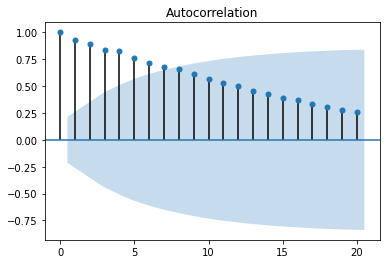

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['data'])
plt.show()

4. PACF Test

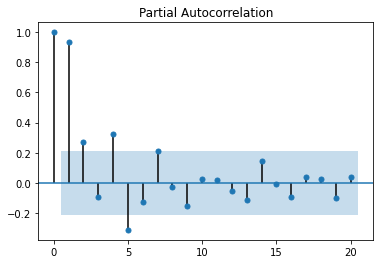

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['data'])
plt.show()

From ACF and PACF, we can see that there are spikes in the data after some intervals, thus we can say that the data is seasonal.
Also, since more than 5% of the ACF and PACF plots are outside the shaded reagion, thus, we can say that the data is non-stationary.



---



**b) Dataset Graph**

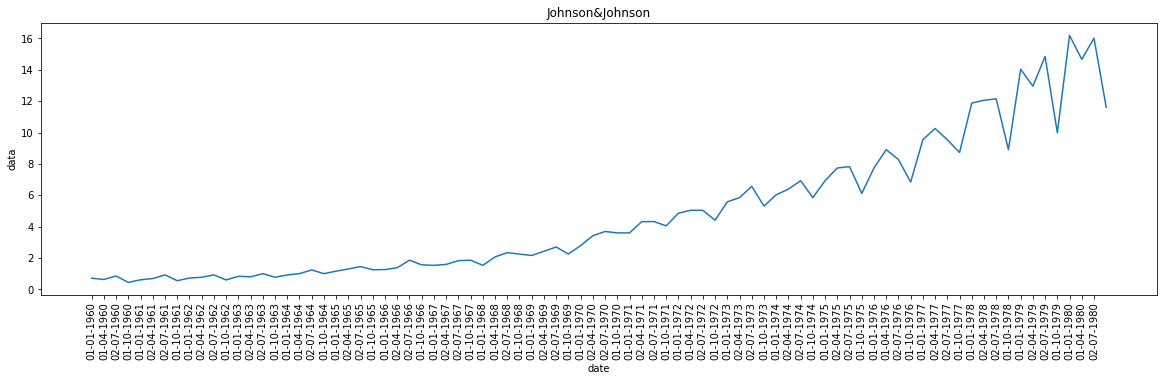

In [63]:
plt.figure(figsize=(20,5))
plt.plot(df['data'])
plt.xticks([i for i in range(0,83)],df.date, rotation=90)
plt.xlabel("date")
plt.ylabel("data")
plt.title('Johnson&Johnson')
plt.show()

In [64]:
df['meanRoll'] = df['data'].rolling(5).mean()
df['stdRoll'] = df['data'].rolling(5).std()

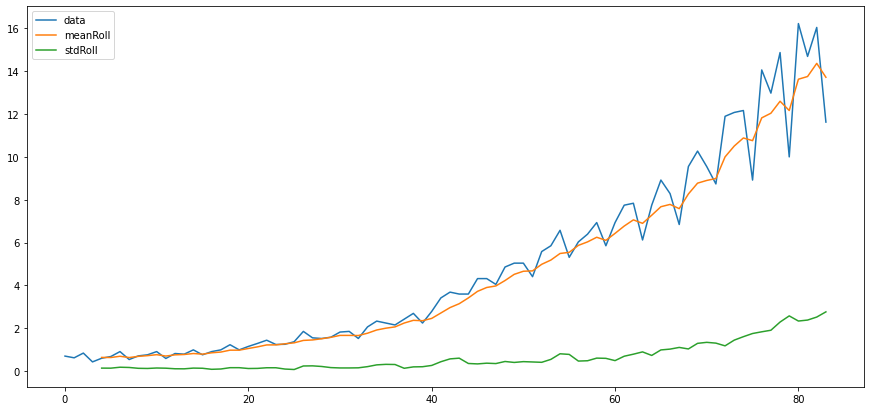

In [65]:
df.plot(figsize=[15,7])
df.drop(df.columns[-2:],axis=1,inplace=True)

By seeing the graph above, we can see a seasonality in the data, as there are spikes in the plot.
Also, by observing the graph, we can see that the mean is not constant here, rather it is increasing, thus it is non-stationary. 

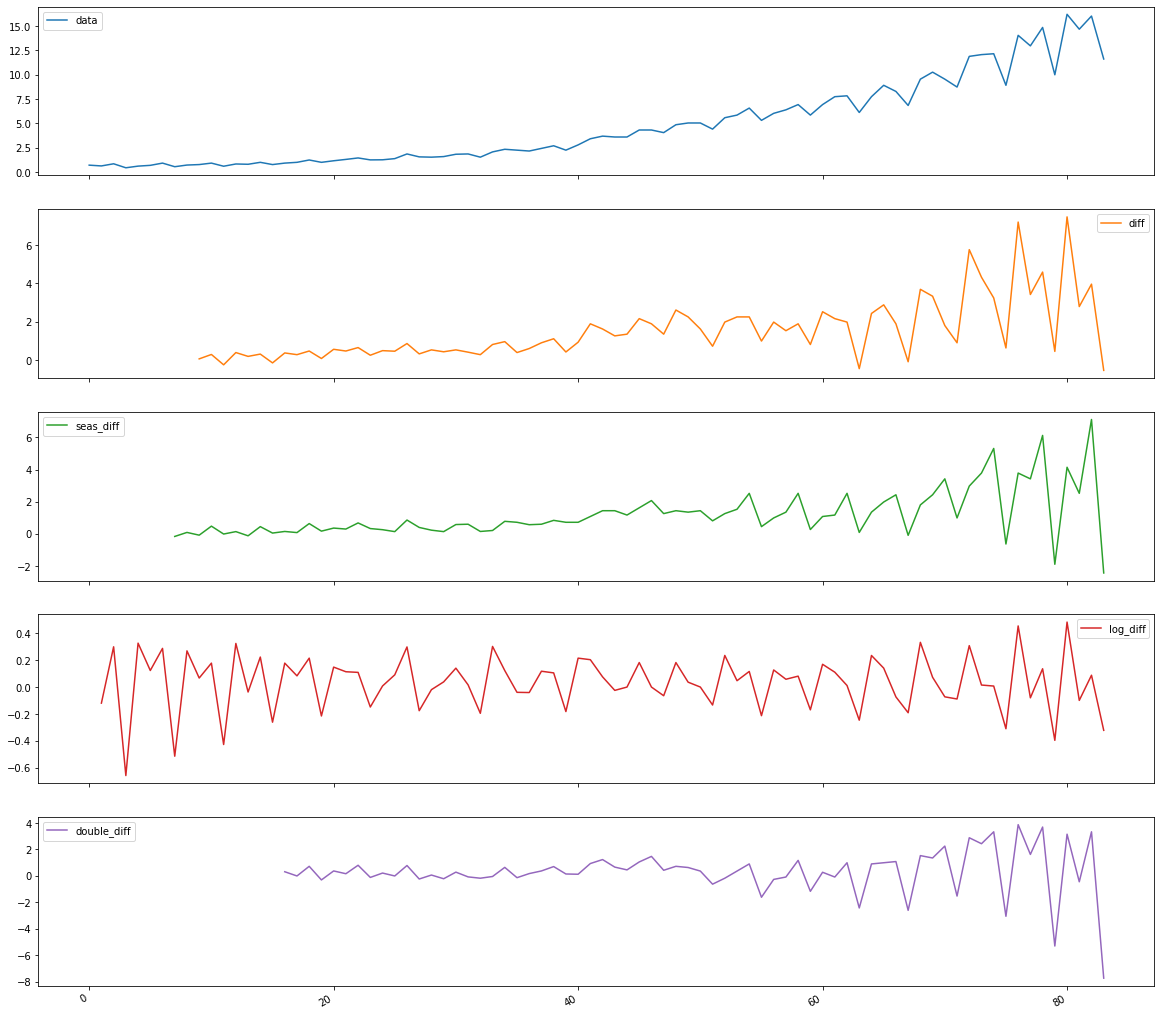

In [100]:
# Differencing
df['diff'] = df['data'].diff(periods=9)

# Seasonal Differencing
df['seas_diff'] = df['data'].diff(periods=7)

# Transformation (here we use log transformation)
df_log = np.log(df['data'])
df['log_diff'] = df_log.diff(periods=1)

df['double_diff'] = df['seas_diff'].diff(periods=9)

df.plot(subplots=True, figsize=(20,20))
plt.show()

In [67]:
adf_test('diff')
print("\n")
kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  0.830352
p-value                         0.992111
#Lags Used                     12.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.615118
p-value                   0.021262
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [68]:
adf_test('seas_diff')
print("\n")
kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  0.147233
p-value                         0.969142
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.624570
p-value                   0.020403
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [69]:
adf_test('log_diff')
print("\n")
kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                 -4.317044
p-value                         0.000415
#Lags Used                      5.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.130997
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [70]:
adf_test('double_diff')
print("\n")
kpss_test('double_diff')

Results of Dickey-Fuller Test for  double_diff 

Test Statistic                 -2.702891
p-value                         0.073539
#Lags Used                     10.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


Results of KPSS Test for  double_diff
Test Statistic            0.074539
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


From ADF and KPSS test, the differenced data becomes stationary.
Here the data is first seasonal differenced and then simple differencing is done.



---



c),d),e),f)

**AR model**

In [74]:
# Defining mean function 
def mean(arr):
  sum=0
  for i in arr:
    sum = sum +i
  mean = sum/len(arr)
  return mean

# Defining my own function for NSE
def nse(e,s):
  diff = []
  num_sum = 0
  denom_sum = 0
  for i,j in zip(e, s):
    diff.append(i-j)
  for i in diff:
    num_sum = num_sum + i**2
  for k in e:
    denom_sum = denom_sum + (k-(mean(e)))**2
  nse = 1-(num_sum/denom_sum) 
  return nse 

In [75]:
#Defining rsquared
def rsquared(arr1,arr2):
  sum1=0
  sum2=0
  sum3=0
  mu1=mean(arr1)
  mu2=mean(arr2)
  for i, j in zip(arr1, arr2):
    sum1+=((i-mu1)*(j-mu2))
  for i in arr1:
    sum2+=((i-mu1)**2)
  for j in arr2:
    sum3+=((j-mu2)**2)
  corr=sum1/(math.sqrt(sum2*sum3))
  rsquared=corr**2
  return rsquared

RMSE of different interval for AR model is :  3.079123991401676
RSquared of different interval for AR model is :  0.04355941039518446
nse of different interval for AR model is :  -0.0038622651624014015


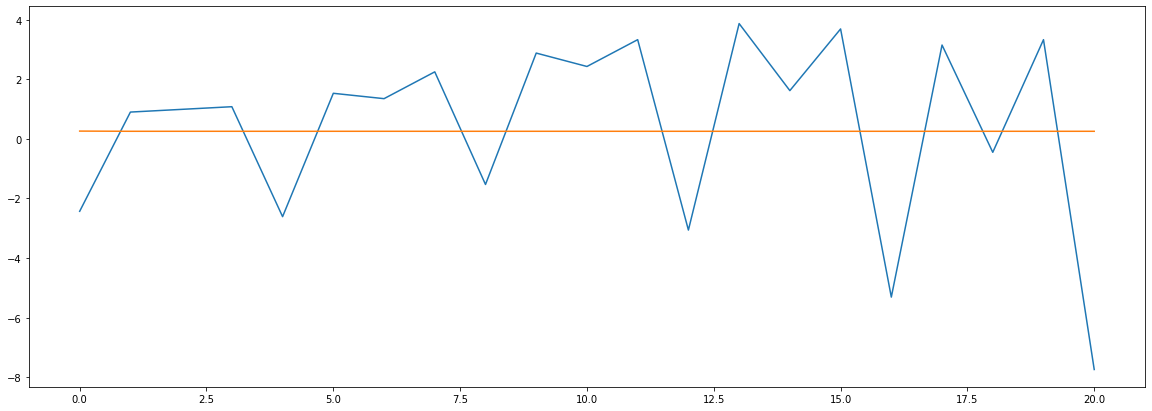

RMSE of different interval for AR model is :  2.244757954597842
RSquared of different interval for AR model is :  0.07065273697967961
nse of different interval for AR model is :  -3.2392997474464273


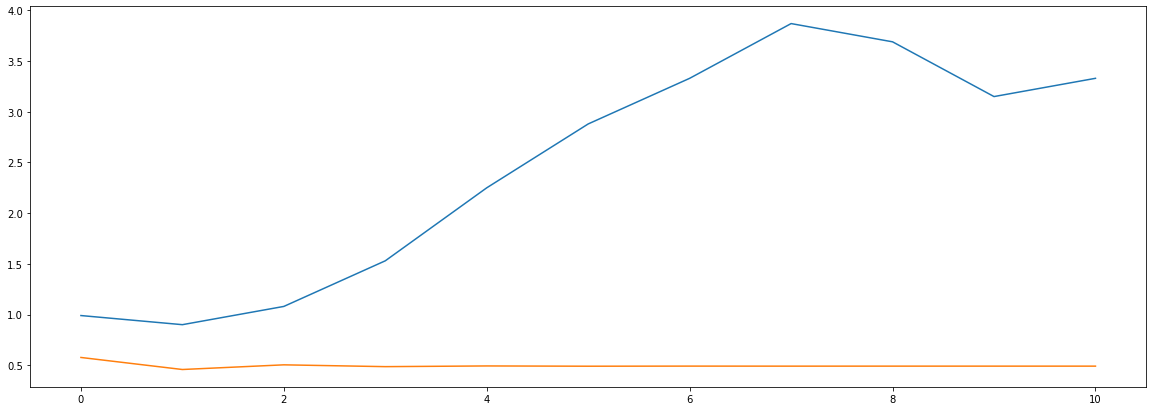

RMSE of different interval for AR model is :  3.1803032531685576
RSquared of different interval for AR model is :  0.006858629345120169
nse of different interval for AR model is :  -0.01904409778095917


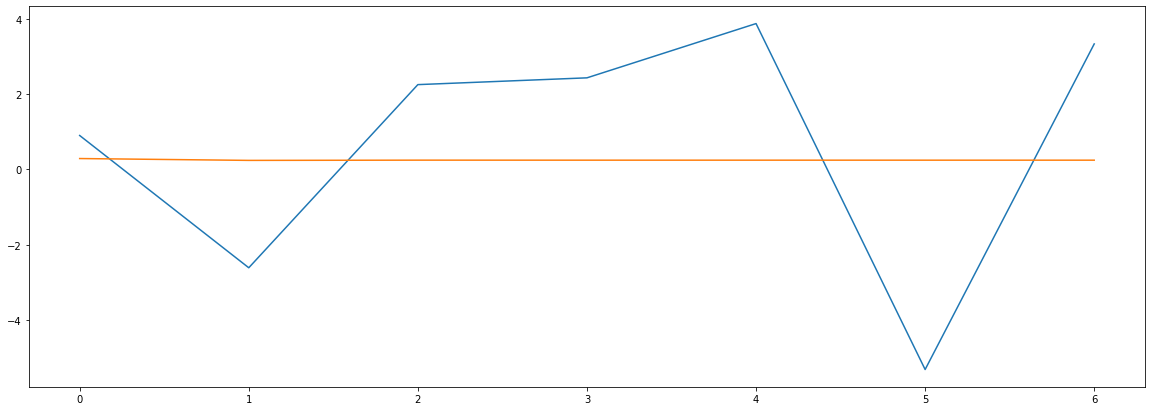

RMSE of different interval for AR model is :  2.3608330520611394
RSquared of different interval for AR model is :  0.6088875940112678
nse of different interval for AR model is :  -2.358358353987966


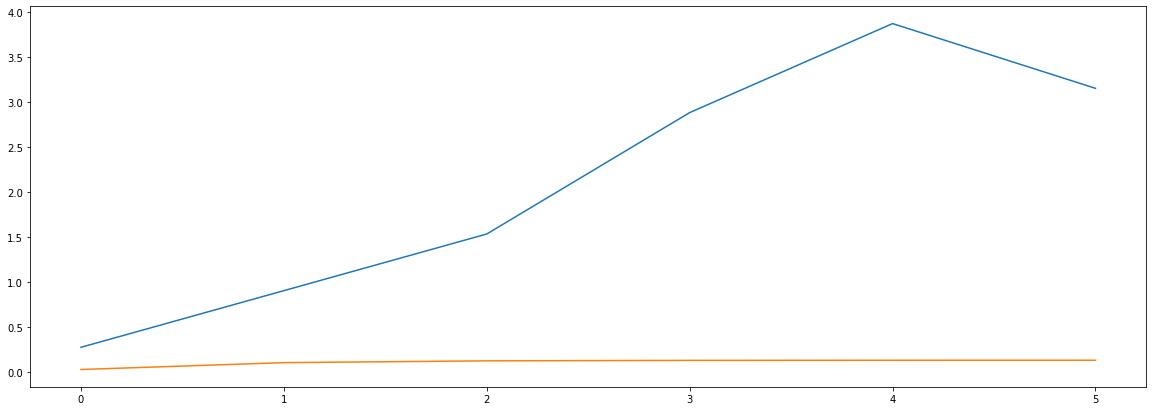

In [83]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = AutoReg(train, lags=1)
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for AR model is : ",rmse)
  print("RSquared of different interval for AR model is : ",r_squared)
  print("nse of different interval for AR model is : ",nse1)
  plt.figure(figsize=(20,7))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [84]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = AutoReg(train, lags=15)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for AR model is : ",rmse)
print("RSquared for AR model is : ",r_squared)
print("nse for AR model is : ",nse1)

RMSE for AR model is :  1.5295754278127862
RSquared for AR model is :  0.7497614123270039
nse for AR model is :  0.5410678834512901


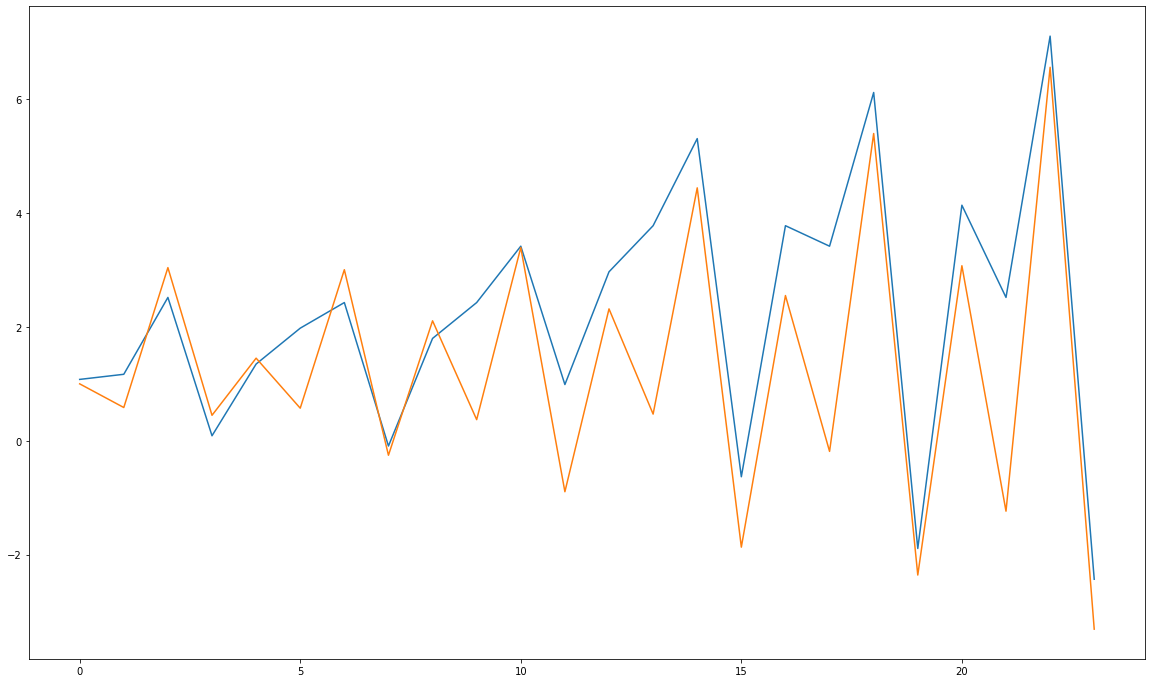

In [85]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**MA model**

RMSE of different interval for MA model is :  3.8933537062107
RSquared of different interval for MA model is :  0.4530884065474668
nse of different interval for MA model is :  -0.604972130748411


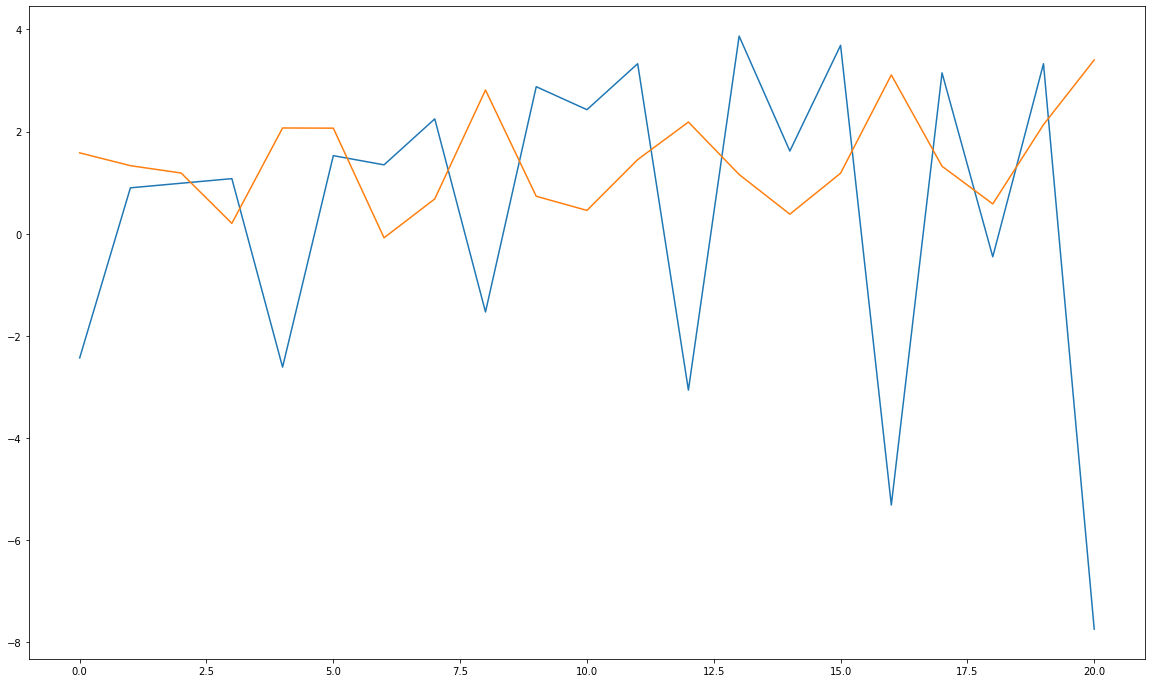

RMSE of different interval for MA model is :  1.8404335543229122
RSquared of different interval for MA model is :  0.008154186675901755
nse of different interval for MA model is :  -1.8496752602420048


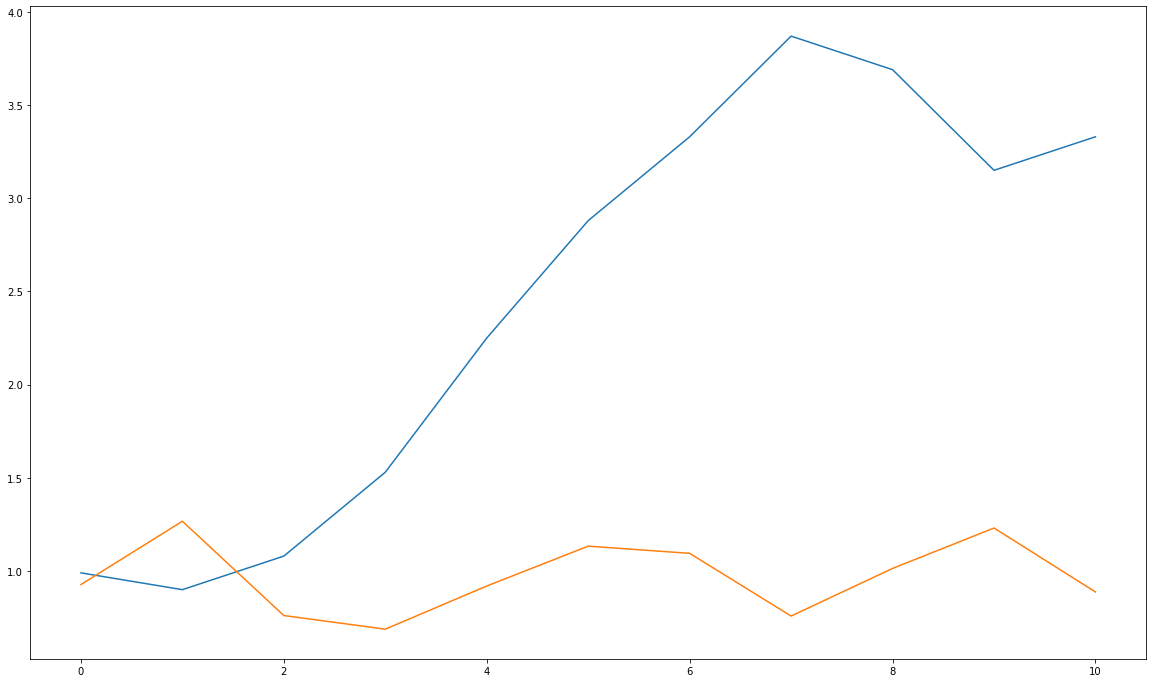

RMSE of different interval for MA model is :  3.2541732187700436
RSquared of different interval for MA model is :  0.15995646102989447
nse of different interval for MA model is :  -0.06693323634412573


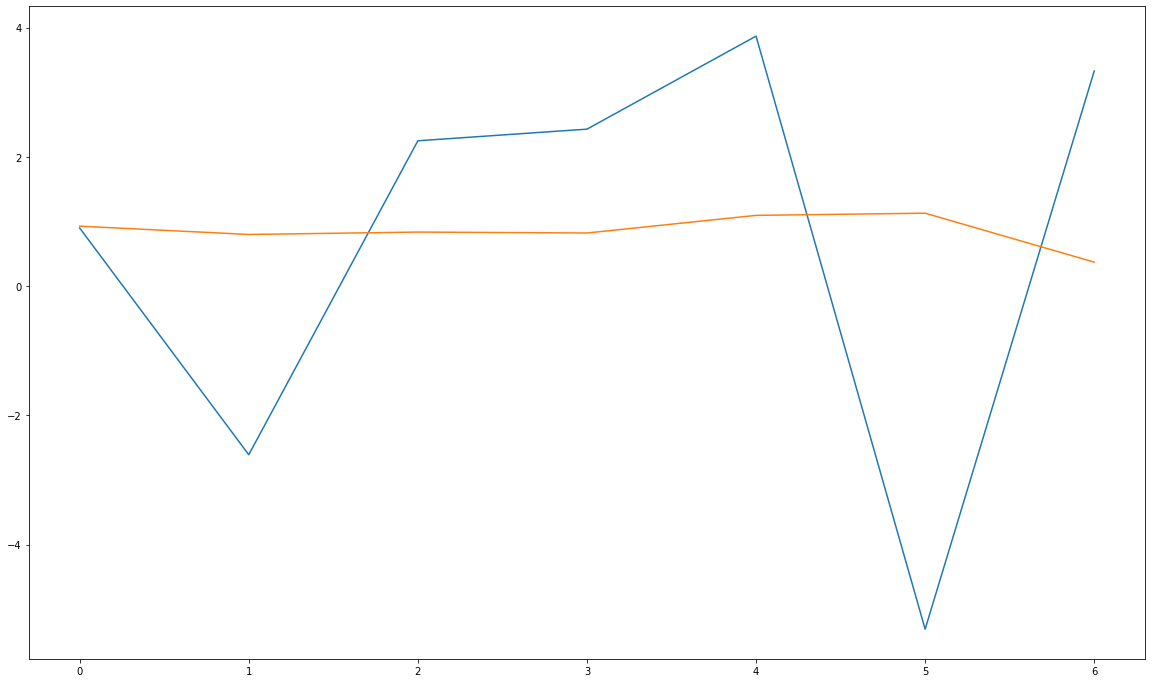

RMSE of different interval for MA model is :  1.7357642409483238
RSquared of different interval for MA model is :  0.003962581628808538
nse of different interval for MA model is :  -0.8154235145555737


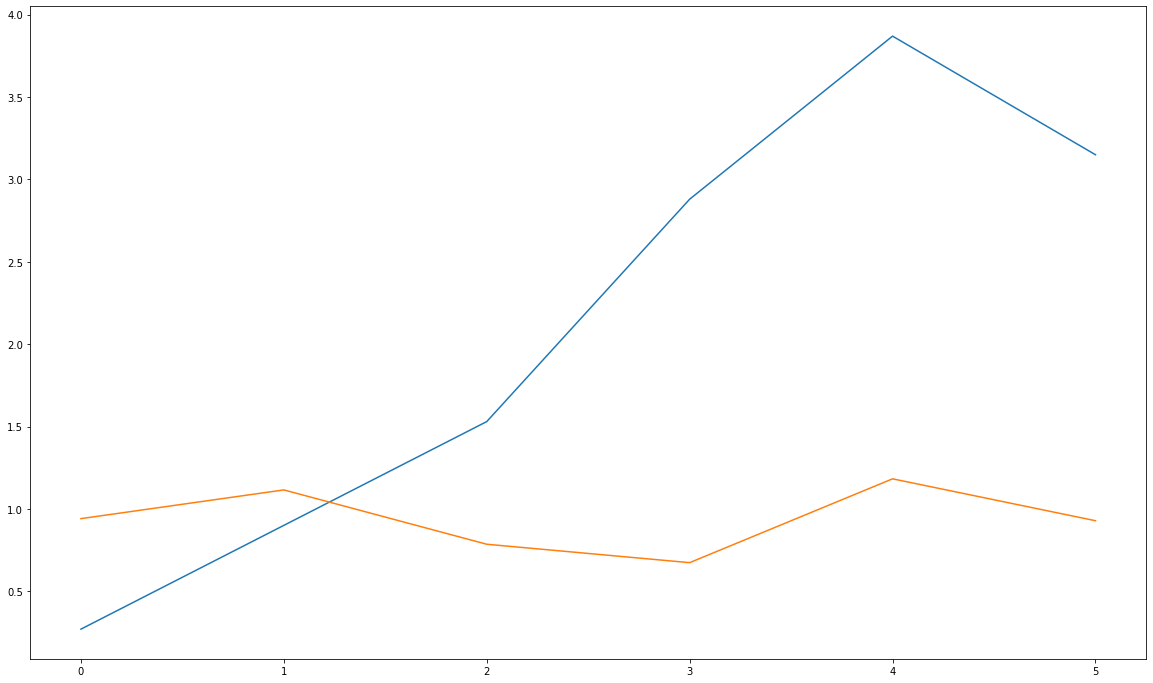

In [86]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(0, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for MA model is : ",rmse)
  print("RSquared of different interval for MA model is : ",r_squared)
  print("nse of different interval for MA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [87]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(0, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for MA model is : ",rmse)
print("RSquared for MA model is : ",r_squared)
print("nse for MA model is : ",nse1)

RMSE for MA model is :  1.9634701192585835
RSquared for MA model is :  0.34420694990891115
nse for MA model is :  0.24376765693003288


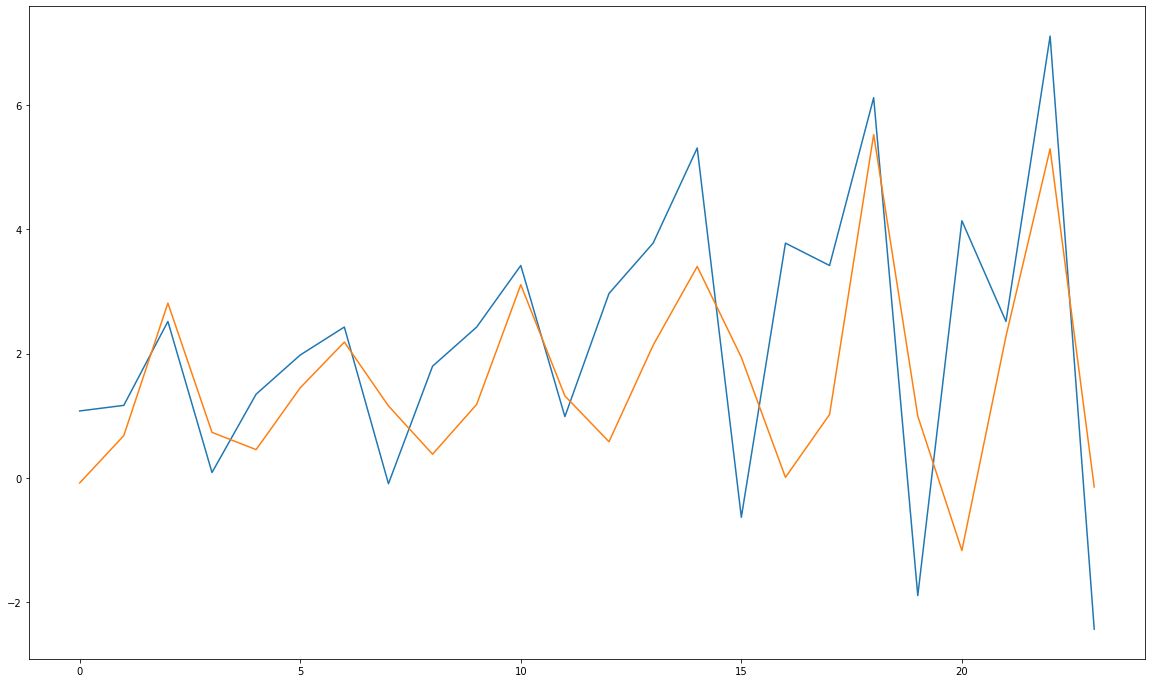

In [88]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**ARMA model**

RMSE of different interval for ARMA model is :  3.972259322377675
RSquared of different interval for ARMA model is :  0.697652352338569
nse of different interval for ARMA model is :  -0.6706864882568617


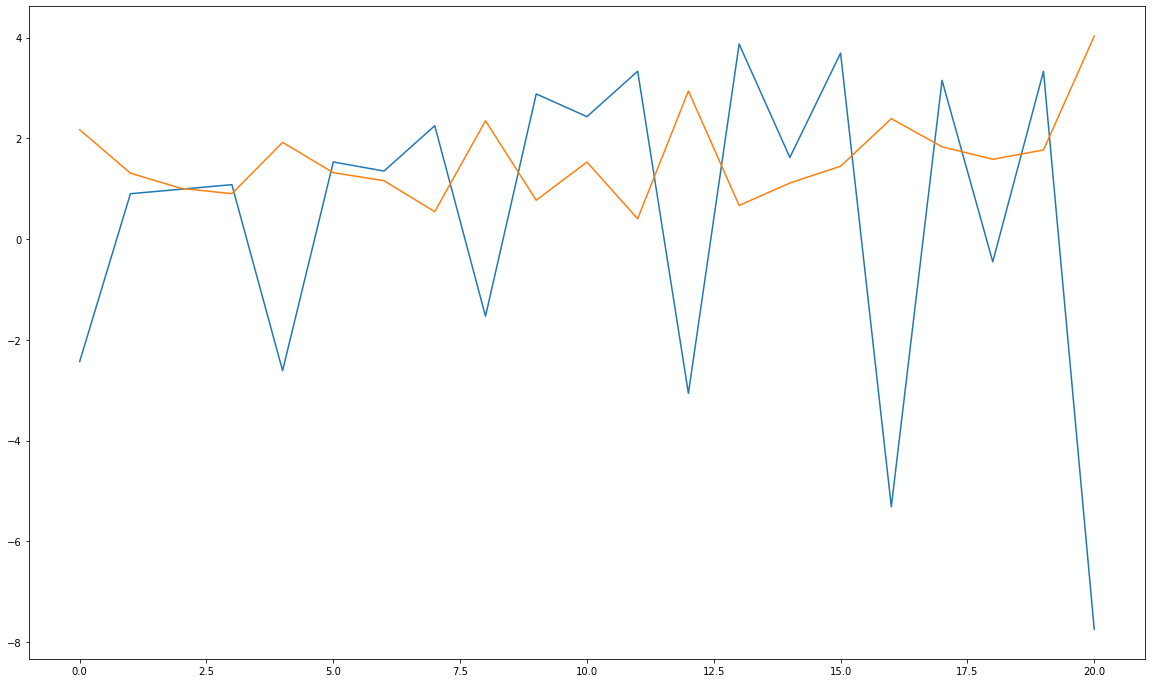

RMSE of different interval for ARMA model is :  2.1594655684442507
RSquared of different interval for ARMA model is :  0.10845814111435848
nse of different interval for ARMA model is :  -2.9232650958290236


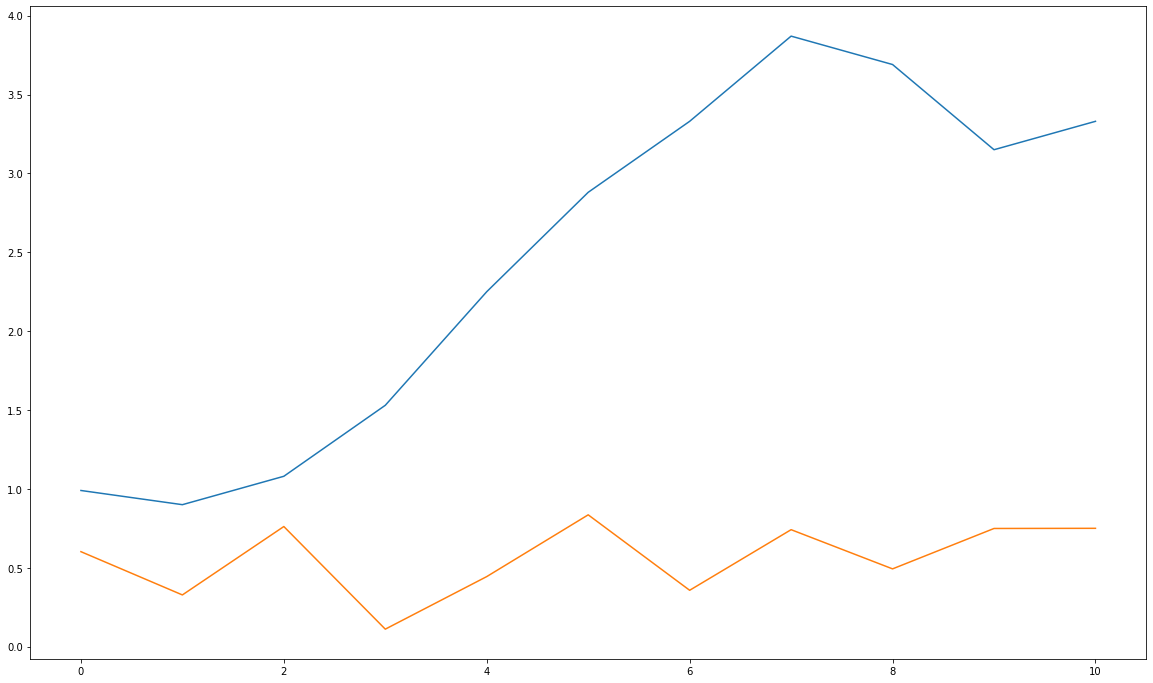

RMSE of different interval for ARMA model is :  3.234846894231872
RSquared of different interval for ARMA model is :  0.14735777398934788
nse of different interval for ARMA model is :  -0.05429797295588168


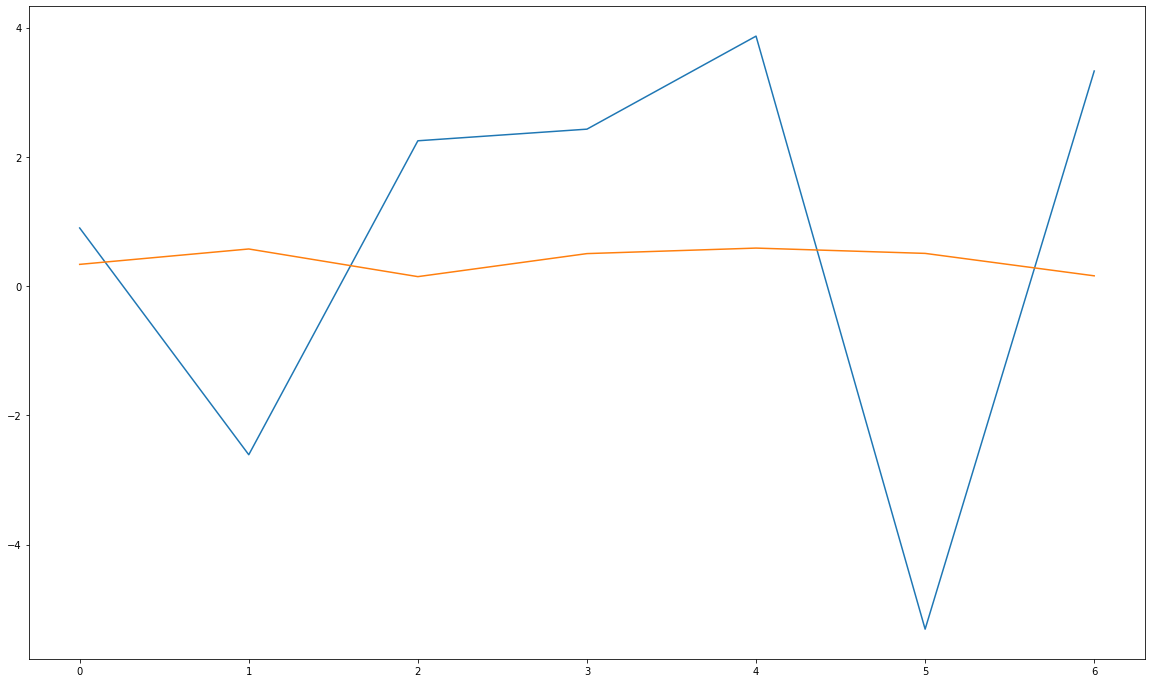

RMSE of different interval for ARMA model is :  2.1384935411575388
RSquared of different interval for ARMA model is :  2.9927331332533475e-05
nse of different interval for ARMA model is :  -1.7555758382264322


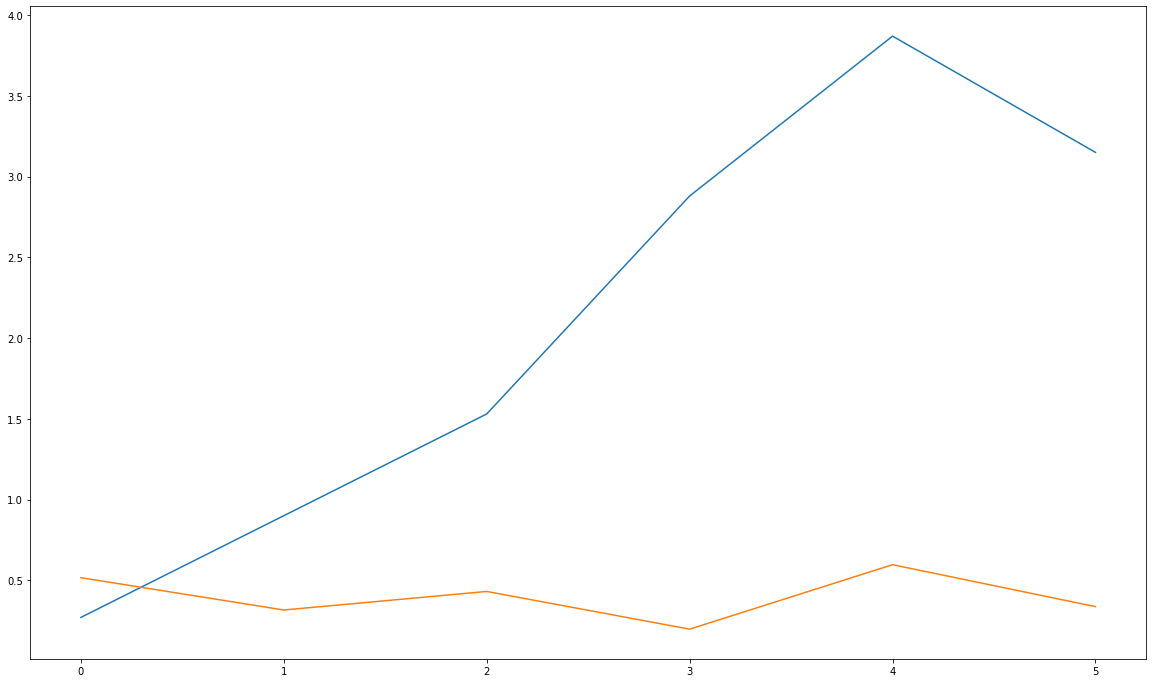

In [89]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for ARMA model is : ",rmse)
  print("RSquared of different interval for ARMA model is : ",r_squared)
  print("nse of different interval for ARMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [90]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for ARMA model is : ",rmse)
print("RSquared for ARMA model is : ",r_squared)
print("nse for ARMA model is : ",nse1)

RMSE for ARMA model is :  1.447813552279108
RSquared for ARMA model is :  0.6124372260520349
nse for ARMA model is :  0.5888200495589364


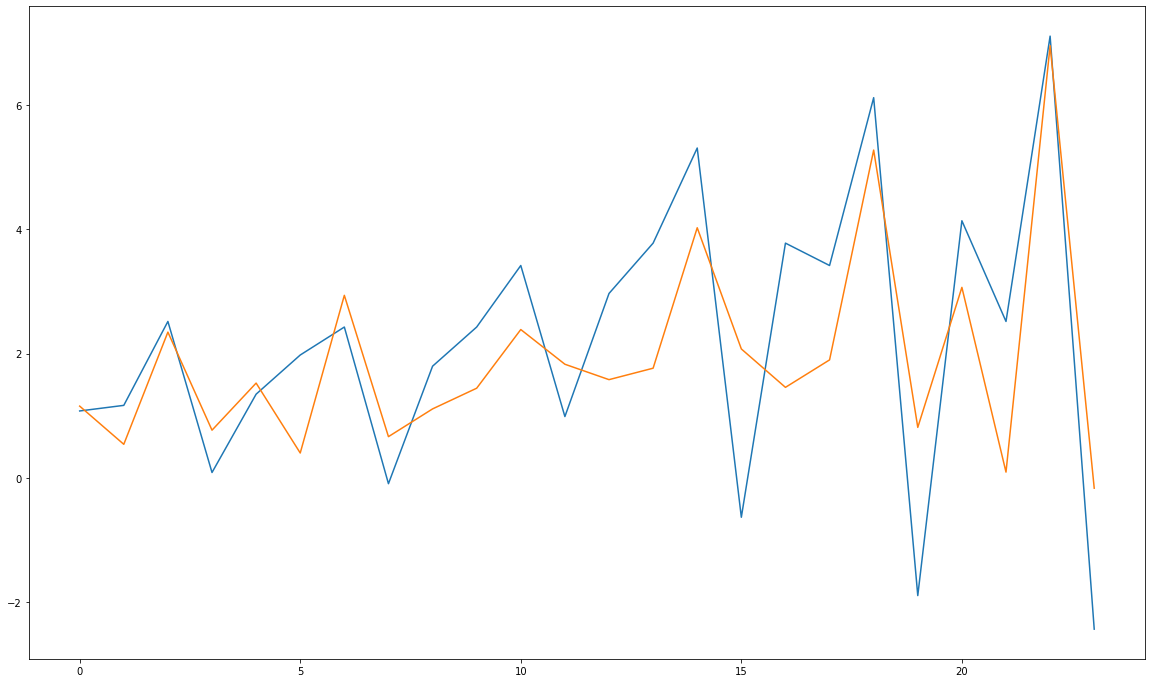

In [91]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**ARIMA model**

RMSE of different interval for ARIMA model is :  3.977592633714514
RSquared of different interval for ARIMA model is :  0.546144155318289
nse of different interval for ARIMA model is :  -0.6751757585274611


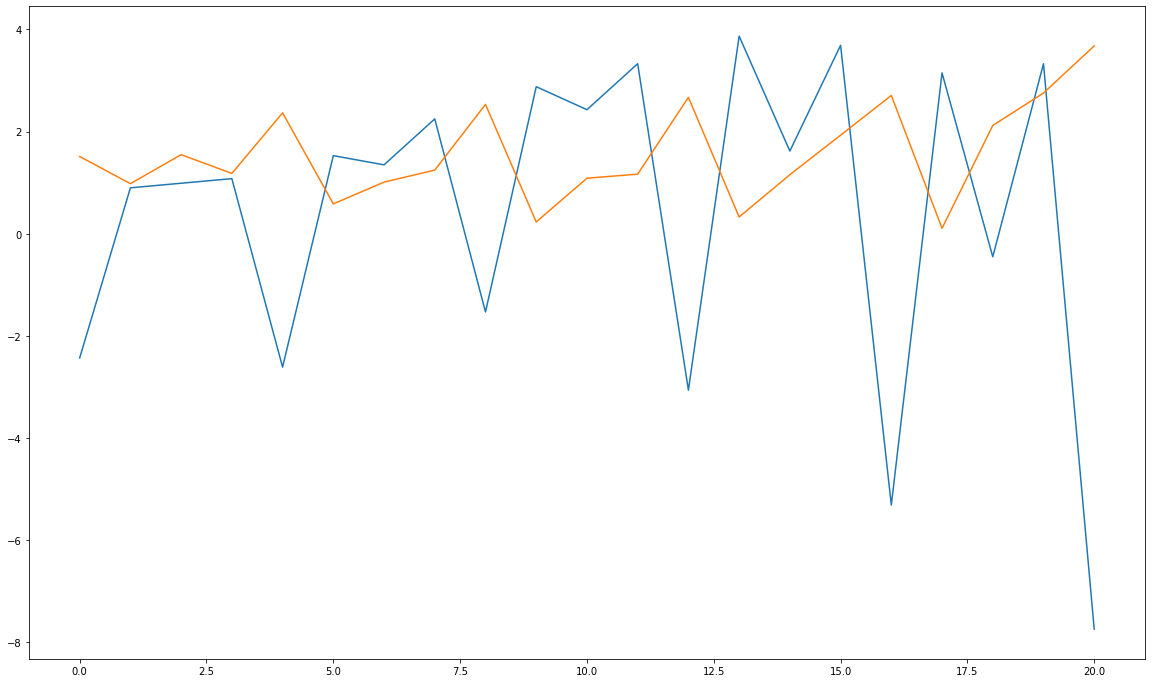

RMSE of different interval for ARIMA model is :  2.22821961004396
RSquared of different interval for ARIMA model is :  0.047510748171542994
nse of different interval for ARIMA model is :  -3.1770634364526407


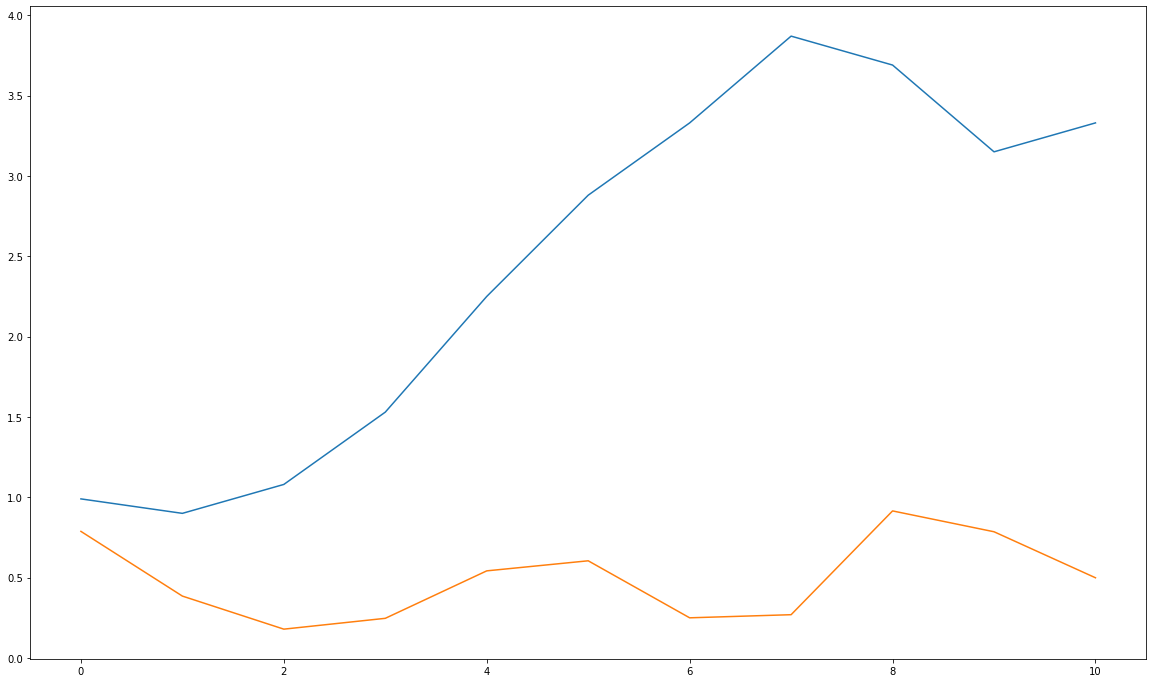

RMSE of different interval for ARIMA model is :  3.1956481003499673
RSquared of different interval for ARIMA model is :  0.025807567208081642
nse of different interval for ARIMA model is :  -0.028901522601355145


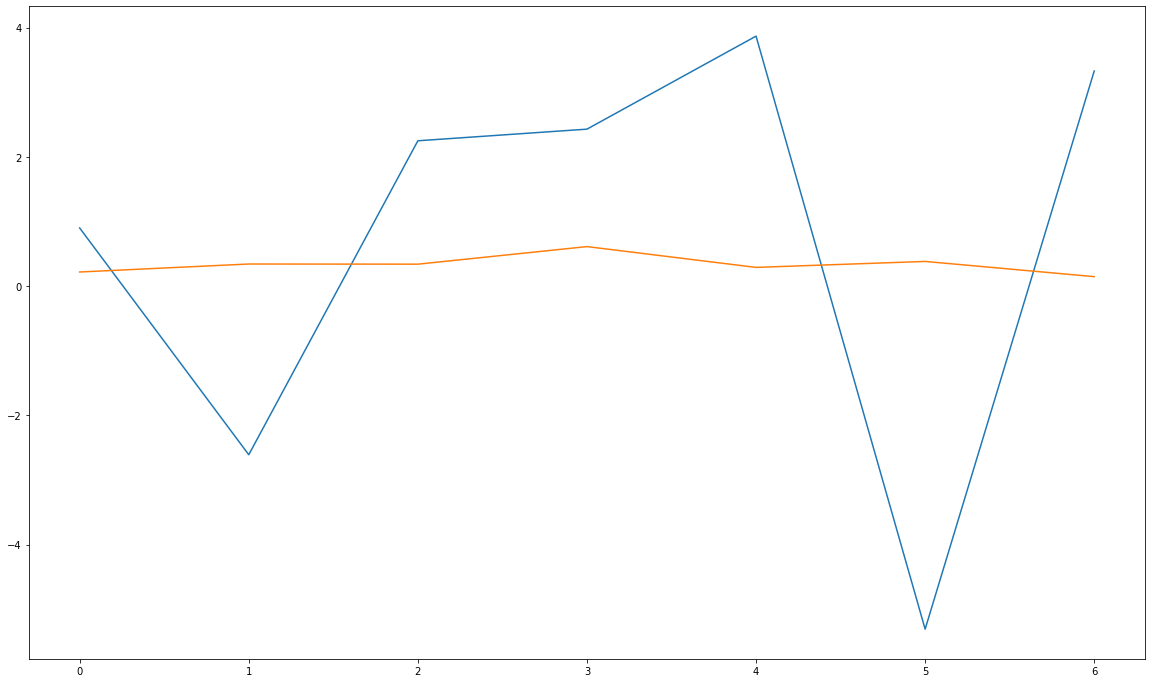

RMSE of different interval for ARIMA model is :  2.1883719012957052
RSquared of different interval for ARIMA model is :  0.08057388338943168
nse of different interval for ARIMA model is :  -1.8856173586491365


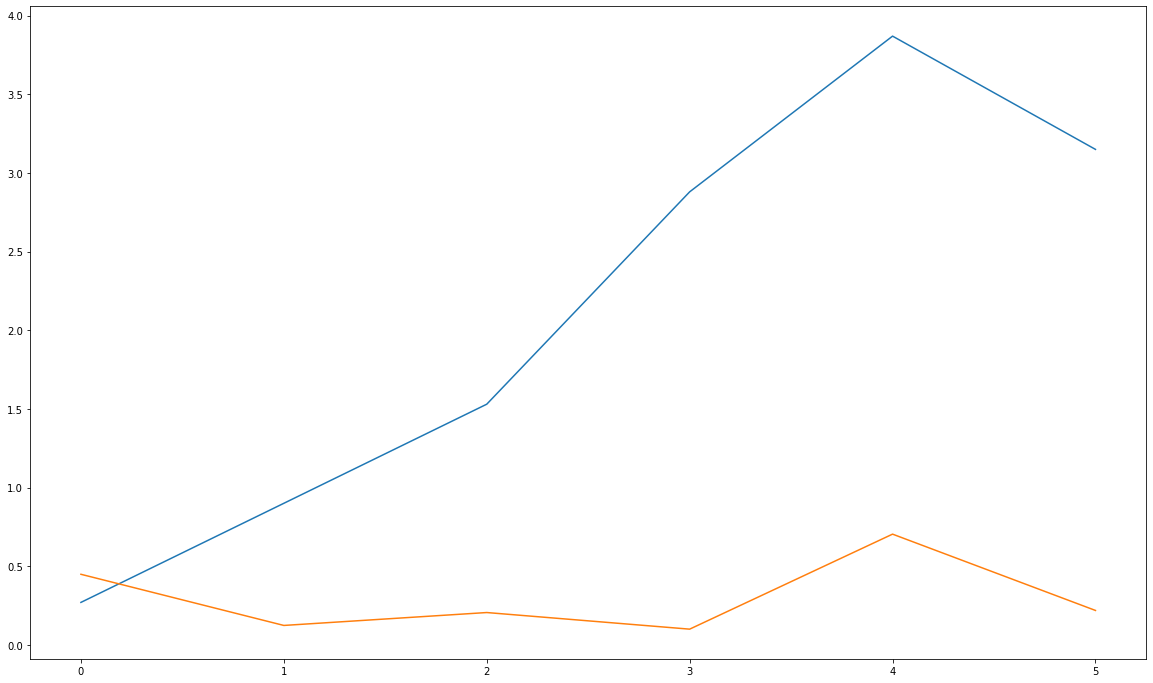

In [92]:
data1 = df['double_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 1, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for ARIMA model is : ",rmse)
  print("RSquared of different interval for ARIMA model is : ",r_squared)
  print("nse of different interval for ARIMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [93]:
data = df['seas_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 1, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for ARIMA model is : ",rmse)
print("RSquared for ARIMA model is : ",r_squared)
print("nse for ARIMA model is : ",nse1)

RMSE for ARIMA model is :  0.8119896884783188
RSquared for ARIMA model is :  0.9019916320024872
nse for ARIMA model is :  0.8706674968761805


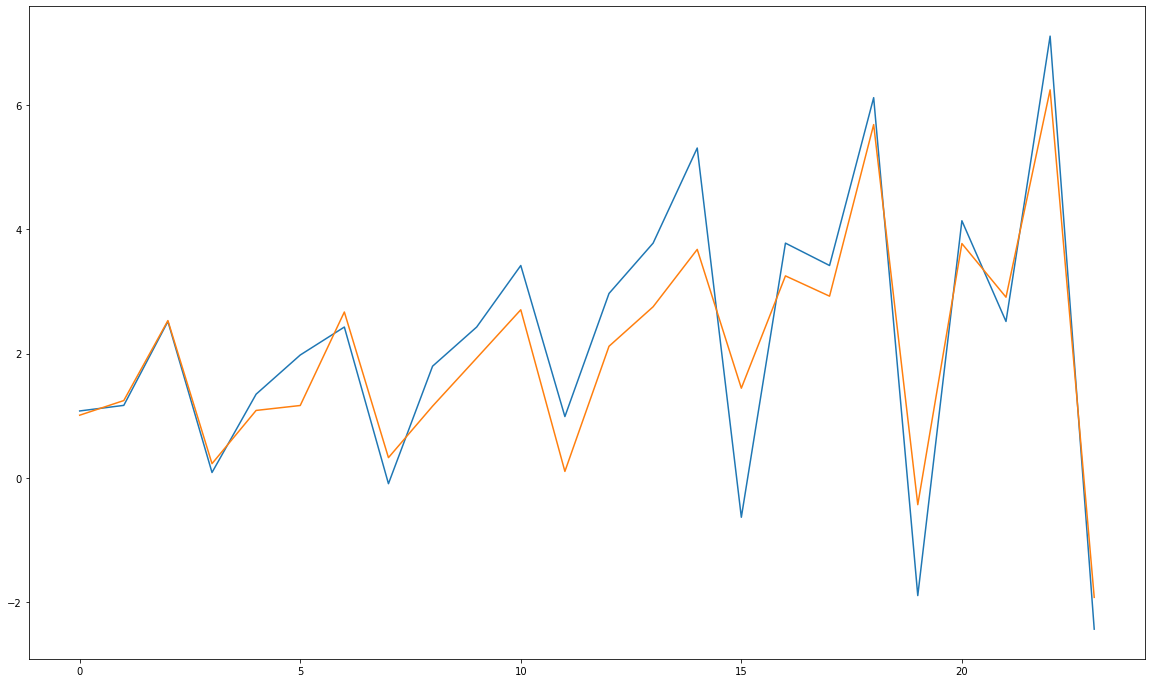

In [94]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

**SARIMA model**

RMSE of different interval for SARIMA model is :  8.787773293699011
RSquared of different interval for SARIMA model is :  0.011396948200618515
nse of different interval for SARIMA model is :  -7.30042391482746


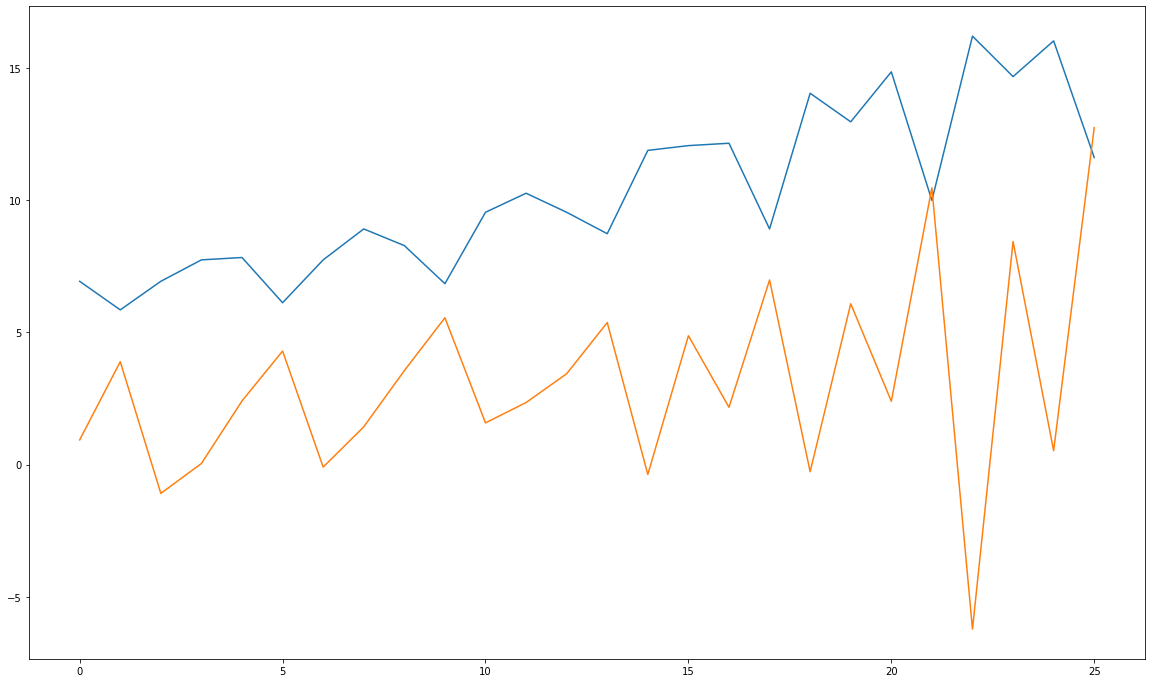

RMSE of different interval for SARIMA model is :  10.211867124892184
RSquared of different interval for SARIMA model is :  0.39114270857445843
nse of different interval for SARIMA model is :  -8.4286923615903


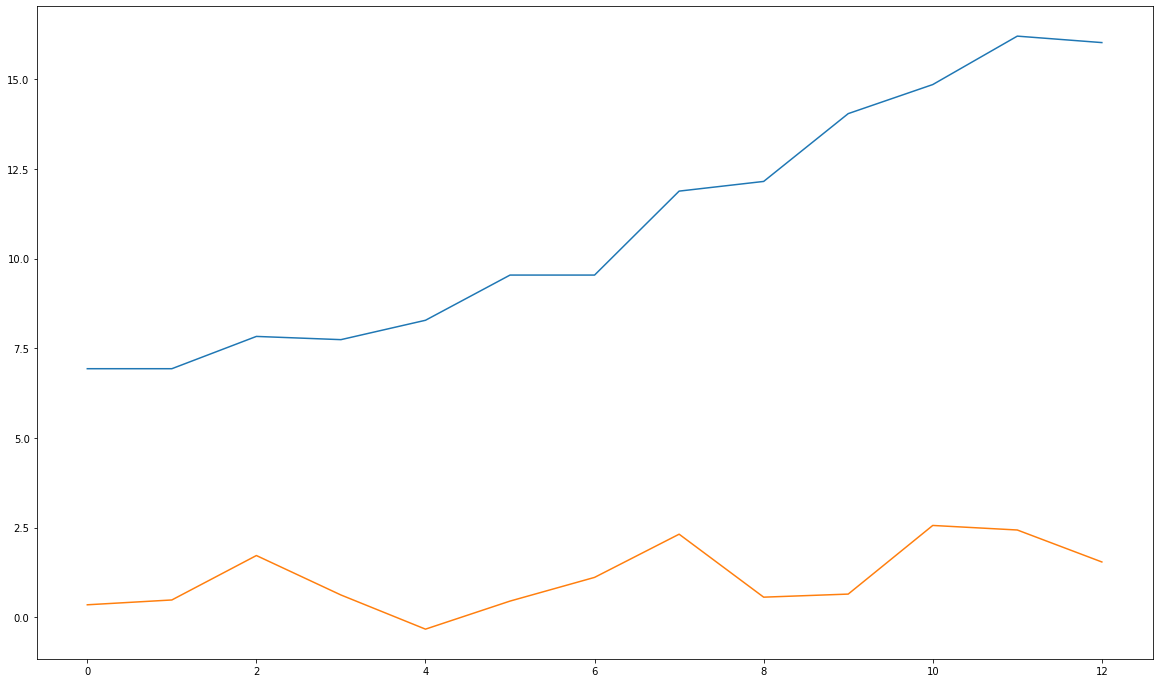

RMSE of different interval for SARIMA model is :  9.916428214784897
RSquared of different interval for SARIMA model is :  0.0018742454294595017
nse of different interval for SARIMA model is :  -8.804533434930798


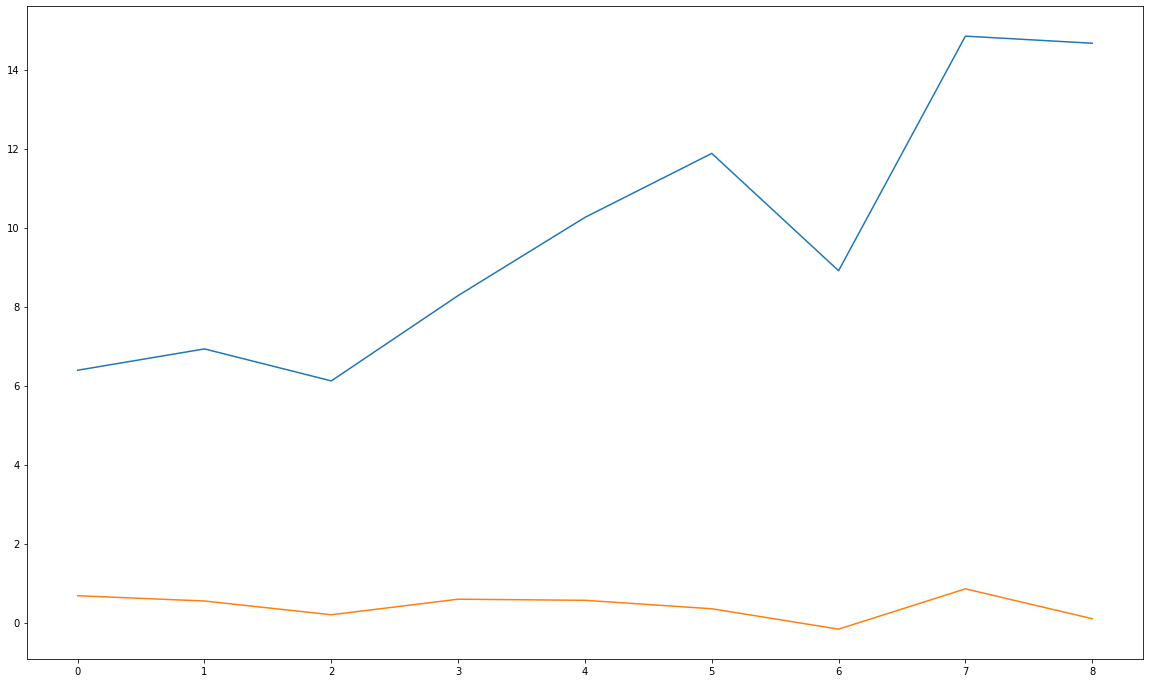

RMSE of different interval for SARIMA model is :  10.51371435349168
RSquared of different interval for SARIMA model is :  0.024138800818531054
nse of different interval for SARIMA model is :  -7.792276712150974


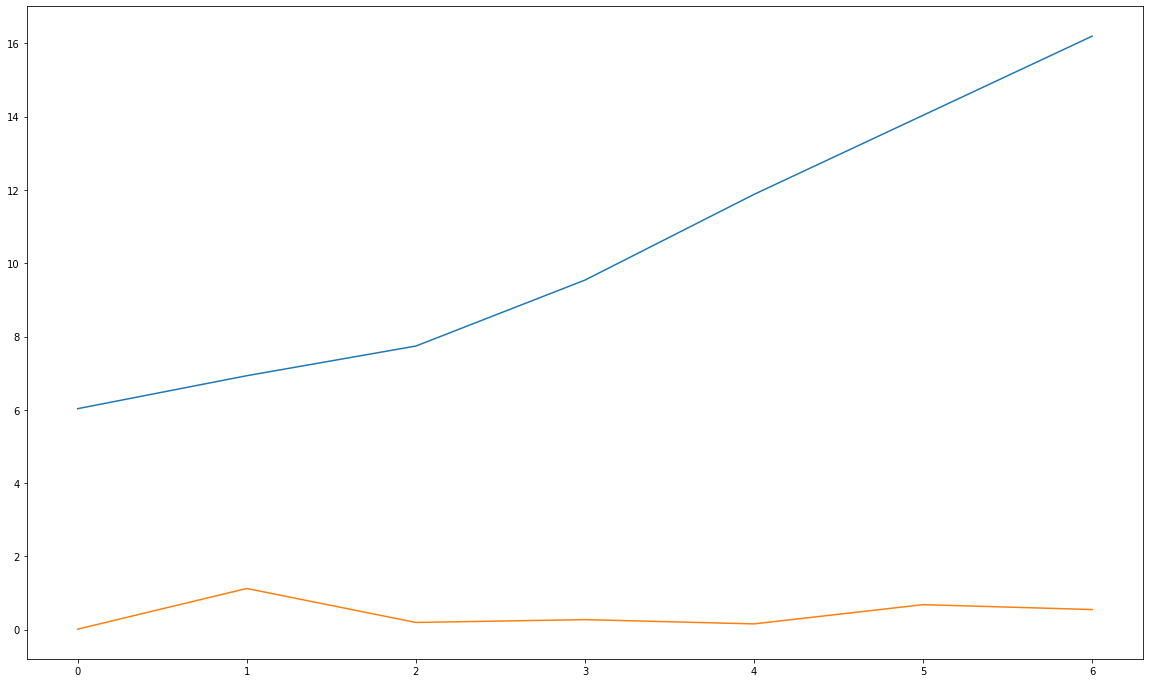

In [95]:
data1 = df['data'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
  model_fit = mod.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  nse1 = nse(test,yhat)
  print("RMSE of different interval for SARIMA model is : ",rmse)
  print("RSquared of different interval for SARIMA model is : ",r_squared)
  print("nse of different interval for SARIMA model is : ",nse1)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat)
  plt.show()

In [96]:
data = df['data'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = mod.fit()
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6809      0.116     -5.861      0.000      -0.909      -0.453
ma.L1         -0.3954      0.161     -2.462      0.014      -0.710      -0.081
ar.S.L12       0.9714      0.481      2.018      0.044       0.028       1.915
ma.S.L12      -0.4771      0.526     -0.907      0.365      -1.508       0.554
sigma2         0.5784      0.157      3.691      0.000       0.271       0.886


In [97]:
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
nse1 = nse(test,yhat)

print("RMSE for SARIMA model is : ",rmse)
print("RSquared for SARIMA model is : ",r_squared)
print("nse for SARIMA model is : ",nse1)

RMSE for SARIMA model is :  1.0167867012773284
RSquared for SARIMA model is :  0.8916790113386717
nse for SARIMA model is :  0.8888774244452069


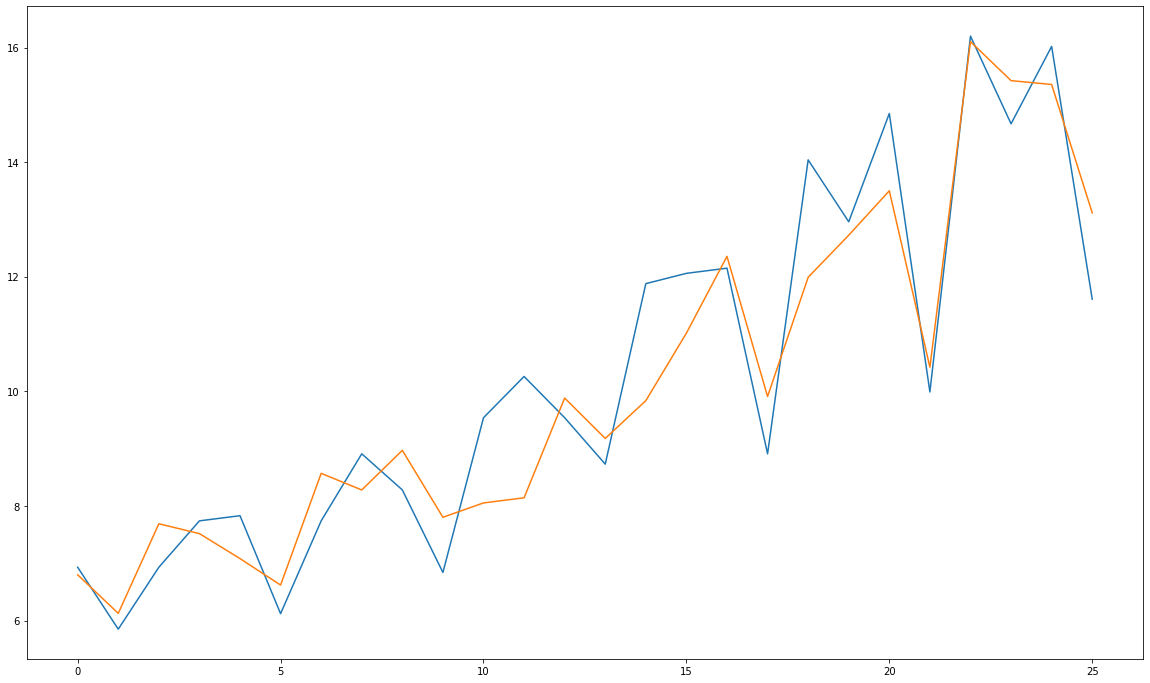

In [98]:
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat)
plt.show()

Based on RMSE value of different model such as AR, MA, ARMA, ARIMA, SARIMA, the model which is giving low RMSE value is ARIMA(3,1,3) model and is the best model for this.